Since Jan. 1, 2015, The Washington Post has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

They have been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [ ]:
df_fatalities.shape

(2535, 14)

In [ ]:
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [ ]:
df_hh_income.shape

(29322, 3)

In [ ]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [ ]:
df_pct_completed_hs.shape

(29329, 3)

In [ ]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [ ]:
df_pct_poverty.shape

(29329, 3)

In [ ]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [ ]:
df_share_race_city.shape

(29268, 7)

## Data Cleaning - Check for Missing Values and Duplicates

In [ ]:
# Drop unecessary "id" column
df_fatalities = df_fatalities.drop(columns="id")

Using the code dataframe.duplicated().any(), it was found that none of the dataframes had duplicated rows.


Using the code
df_fatalities['column name'].isnull().values.any()
it was determined that the dataframe "df_fatalities" had NaN values for the columns "armed", "age", "race" and "flee". However, at this stage, it was not appropriate to eliminate these rows.

In [ ]:
#The dataframe "df_hh_income" has 51 rows with a Median Income of "NaN"
df_hh_income['Median Income'].isnull().sum()

51

In [ ]:
df_hh_income = df_hh_income.dropna()

In [ ]:
# However, it can also be seen that there are also Median Income values of "(X)" and "-".
df_hh_income.groupby("Median Income").count()

,Geographic Area,City
Median Income,,
(X),1113,1113
-,740,740
100000,3,3
100024,1,1
100025,1,1
...,...,...
99777,1,1
99821,1,1
99839,1,1


In [ ]:
# Drop these rows
df_hh_income = df_hh_income[(df_hh_income["Median Income"] != "(X)") & (df_hh_income["Median Income"] != "-")]

In [ ]:
# No Nan values in "df_pct_completed_hs"
df_pct_completed_hs.isnull().values.any()

False

In [ ]:
# However, it can also be seen that there are also "percent_completed_hs" values of "-".
df_pct_completed_hs.groupby("percent_completed_hs").count()

,Geographic Area,City
percent_completed_hs,,
-,197,197
0,51,51
100,1301,1301
11.1,1,1
11.8,1,1
...,...,...
99.5,24,24
99.6,29,29
99.7,14,14


In [ ]:
# Since the most common percentages are 100% and 0%, the 197 instances of "-" will be converted to "0".
df_pct_completed_hs = df_pct_completed_hs.replace('-','0')

In [ ]:
# No Nan values in "df_pct_poverty"
df_pct_poverty.isnull().values.any()

False

In [ ]:
# However, it can also be seen that there are also "poverty_rate" values of "-".
df_pct_poverty.groupby("poverty_rate").count()

,Geographic Area,City
poverty_rate,,
-,201,201
0,1464,1464
0.1,1,1
0.2,8,8
0.3,4,4
...,...,...
93.4,1,1
93.5,1,1
93.8,2,2


In [ ]:
# Based on the data, it seems reasonable to take poverty rates of "-" to mean "0"
df_pct_poverty = df_pct_poverty.replace('-','0')

In [ ]:
# No Nan values in "df_share_race_city"
df_share_race_city.isnull().values.any()

False

In [ ]:
# However, there are 20 cities with no data on any races
df_share_race_city[df_share_race_city["share_white"] == "(X)"]

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
630,AK,Chisana CDP,(X),(X),(X),(X),(X)
678,AK,Flat CDP,(X),(X),(X),(X),(X)
777,AK,Mertarvik CDP,(X),(X),(X),(X),(X)
1946,CA,Almanor CDP,(X),(X),(X),(X),(X)
2134,CA,Caribou CDP,(X),(X),(X),(X),(X)
2160,CA,Cedar Slope CDP,(X),(X),(X),(X),(X)
3194,CA,Silver City CDP,(X),(X),(X),(X),(X)
3248,CA,Sugarloaf Mountain Park CDP,(X),(X),(X),(X),(X)
3331,CA,University of California Merced CDP,(X),(X),(X),(X),(X)
3345,CA,Valley Wells CDP,(X),(X),(X),(X),(X)


In [ ]:
# Remove these rows
df_share_race_city = df_share_race_city[df_share_race_city["share_white"] != "(X)"]

# Poverty Rate in each US State

In [ ]:
# Convert the poverty rate columns entries from strings to floats.
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].astype(float)

In [ ]:
# Average the poverty rates of all the cities in each state
df_poverty_by_state = df_pct_poverty.groupby("Geographic Area").mean()

<ipython-input-30-80941efcc96e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_poverty_by_state = df_pct_poverty.groupby("Geographic Area").mean()


In [ ]:
df_poverty_by_state_ordered = df_poverty_by_state.sort_values(by="poverty_rate", ascending=False)

<BarContainer object of 51 artists>

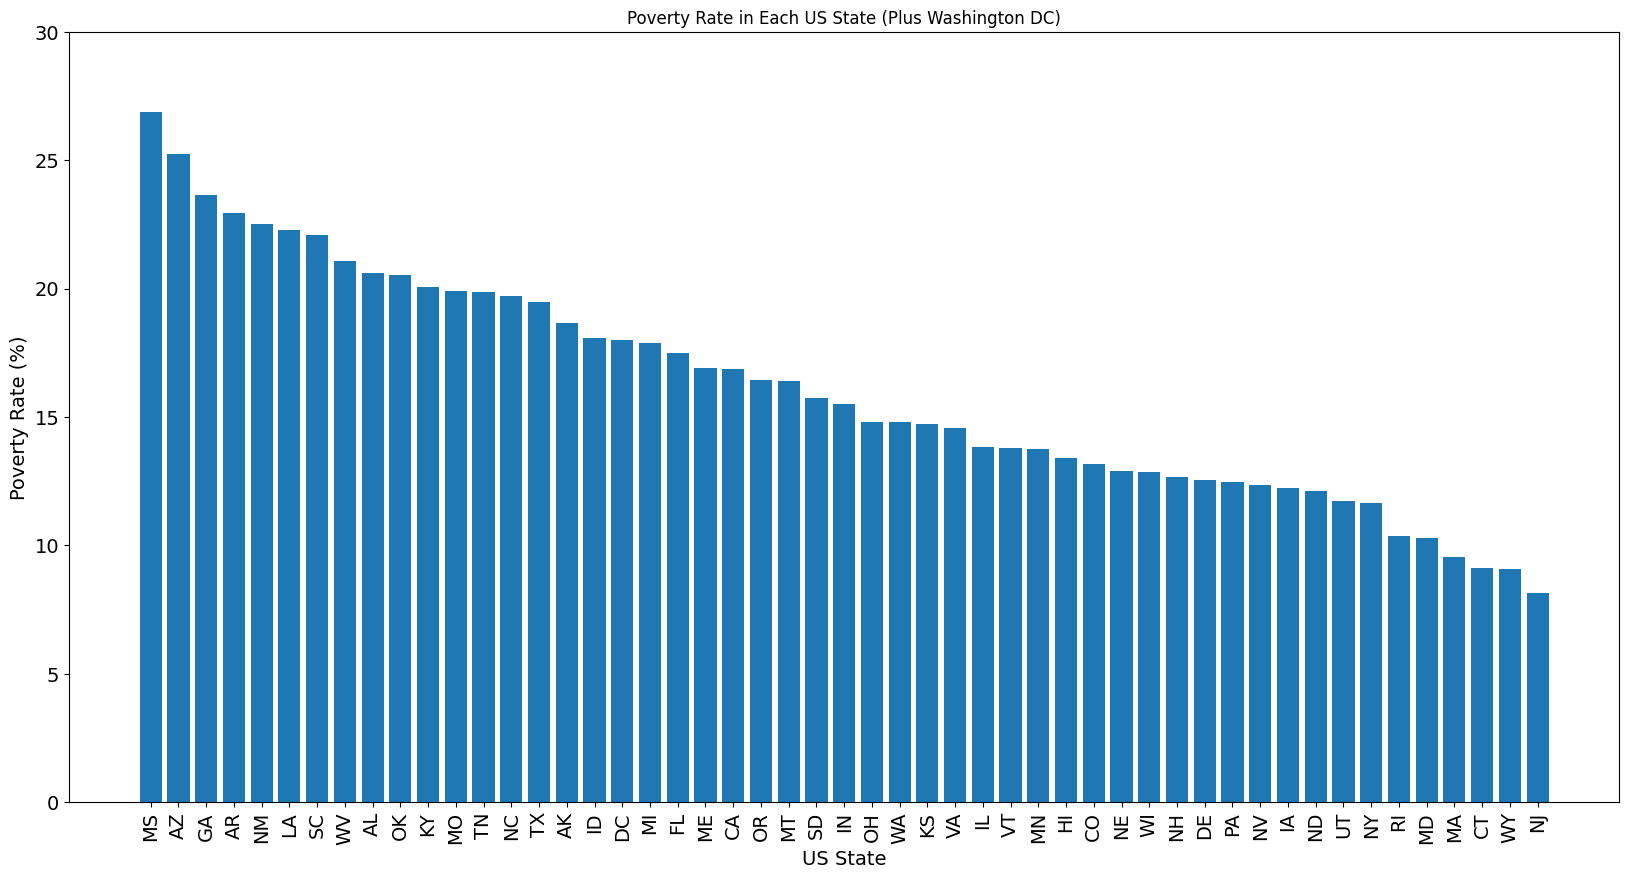

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Poverty Rate in Each US State (Plus Washington DC)")
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("US State", fontsize=14)
plt.ylabel("Poverty Rate (%)", fontsize=14)
plt.ylim(0,30)
plt.bar(df_poverty_by_state_ordered.index, df_poverty_by_state_ordered["poverty_rate"])

The state with the highest poverty rate is Mississippi.

The state with the lowest is New Jersey

Perhaps the more informative and surprising insight is that almost all US states have a poverty rate of over 10% !

# High School Graduation Rate by US State

In [ ]:
# Convert the percent_completed_hs column entries from strings to floats.
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].astype(float)

In [ ]:
# Average the graduation rates of all the cities in each state
df_graduations_by_state = df_pct_completed_hs.groupby("Geographic Area").mean()

<ipython-input-34-0f8d3a75c58f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_graduations_by_state = df_pct_completed_hs.groupby("Geographic Area").mean()


In [ ]:
df_graduations_by_state_ordered = df_graduations_by_state.sort_values(by="percent_completed_hs")

<BarContainer object of 51 artists>

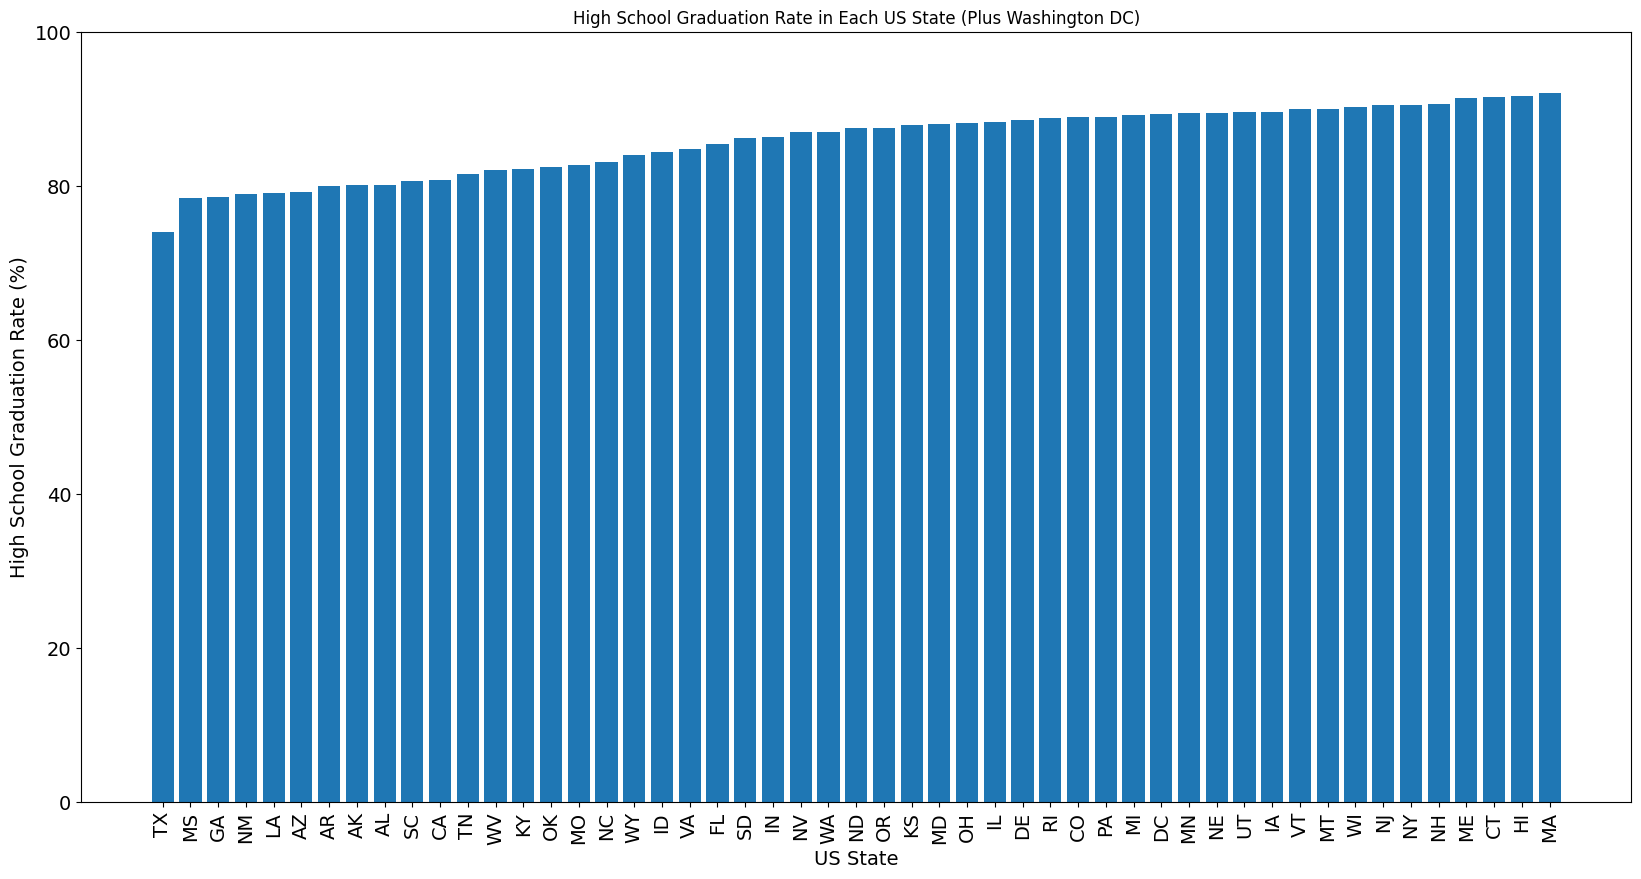

In [ ]:
plt.figure(figsize=(20,10))
plt.title("High School Graduation Rate in Each US State (Plus Washington DC)")
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("US State", fontsize=14)
plt.ylabel("High School Graduation Rate (%)", fontsize=14)
plt.ylim(0,100)
plt.bar(df_graduations_by_state_ordered.index, df_graduations_by_state_ordered["percent_completed_hs"])

The state with the lowest highschool grudation rate is Texas.

The state with the highest is Massachusetts.

# Relationship between Poverty Rates and High School Graduation Rates  

Text(0, 0.5, 'High Schoo Gradudation Rate (%)')

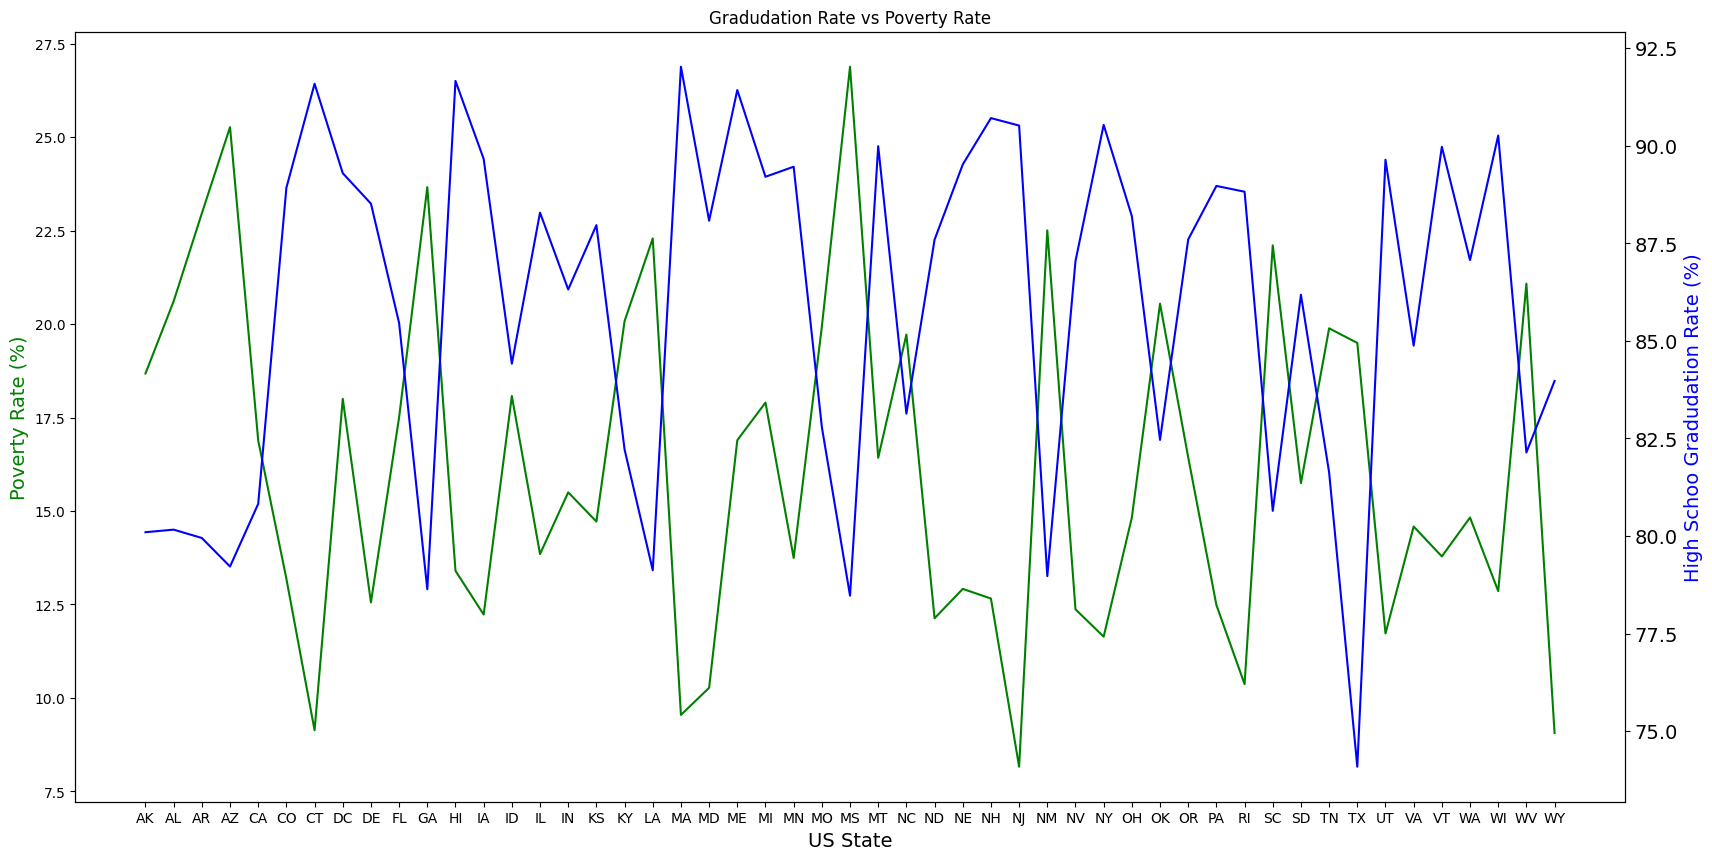

In [ ]:
plt.figure(figsize=(20,10))
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()

plt.title("Gradudation Rate vs Poverty Rate")
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

ax1.plot(df_poverty_by_state.index, df_poverty_by_state["poverty_rate"], color='g')
ax2.plot(df_graduations_by_state.index, df_graduations_by_state["percent_completed_hs"], color='b')
ax1.set_xlabel("US State", fontsize=14)
ax1.set_ylabel("Poverty Rate (%)", color='g', fontsize=14)
ax2.set_ylabel("High Schoo Gradudation Rate (%)", color='b', fontsize=14)

Clearly there is a general pattern being followed:

As the highschool graduation rate goes up, the poverty rate goes down.

However this chart is not the best way to visualise this relationship.

In [ ]:
# Put the poverty rate and graduation rate data into a single dataframe
df_poverty_vs_gradudation = df_poverty_by_state
df_poverty_vs_gradudation["graduation_rate"] = df_graduations_by_state["percent_completed_hs"]

Text(87.72222222222221, 0.5, 'High School Graduation Rate (%)')

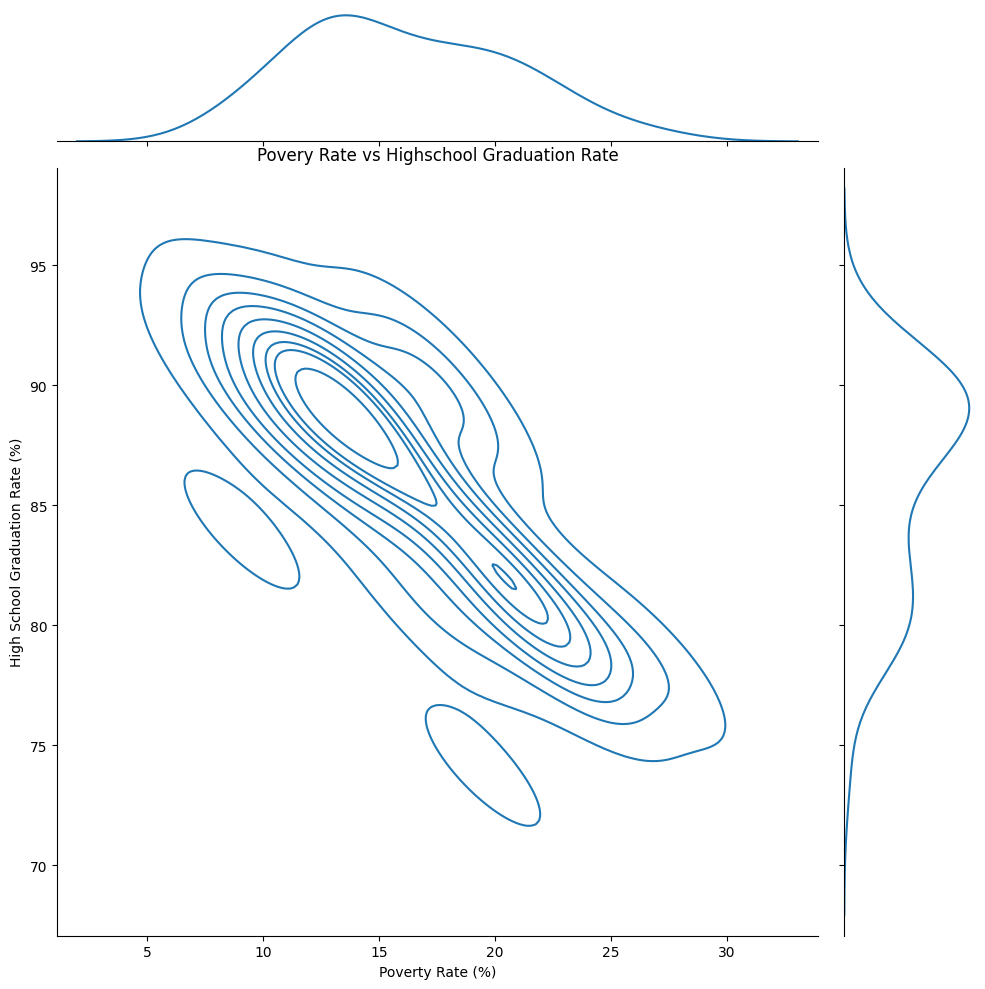

In [ ]:
sns.jointplot(
    data=df_poverty_vs_gradudation,
    x='poverty_rate',
    y='graduation_rate',
    palette='Set2',
    kind='kde',
    height=10
    )

plt.title("Povery Rate vs Highschool Graduation Rate")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("High School Graduation Rate (%)")

Using a scetter plot with a Kernel Density Estimate gives a much better representation than the superimposed line graph above.

However there are still other representations that can give even more information.

Text(0, 0.5, 'High School Graduation Rate (%)')

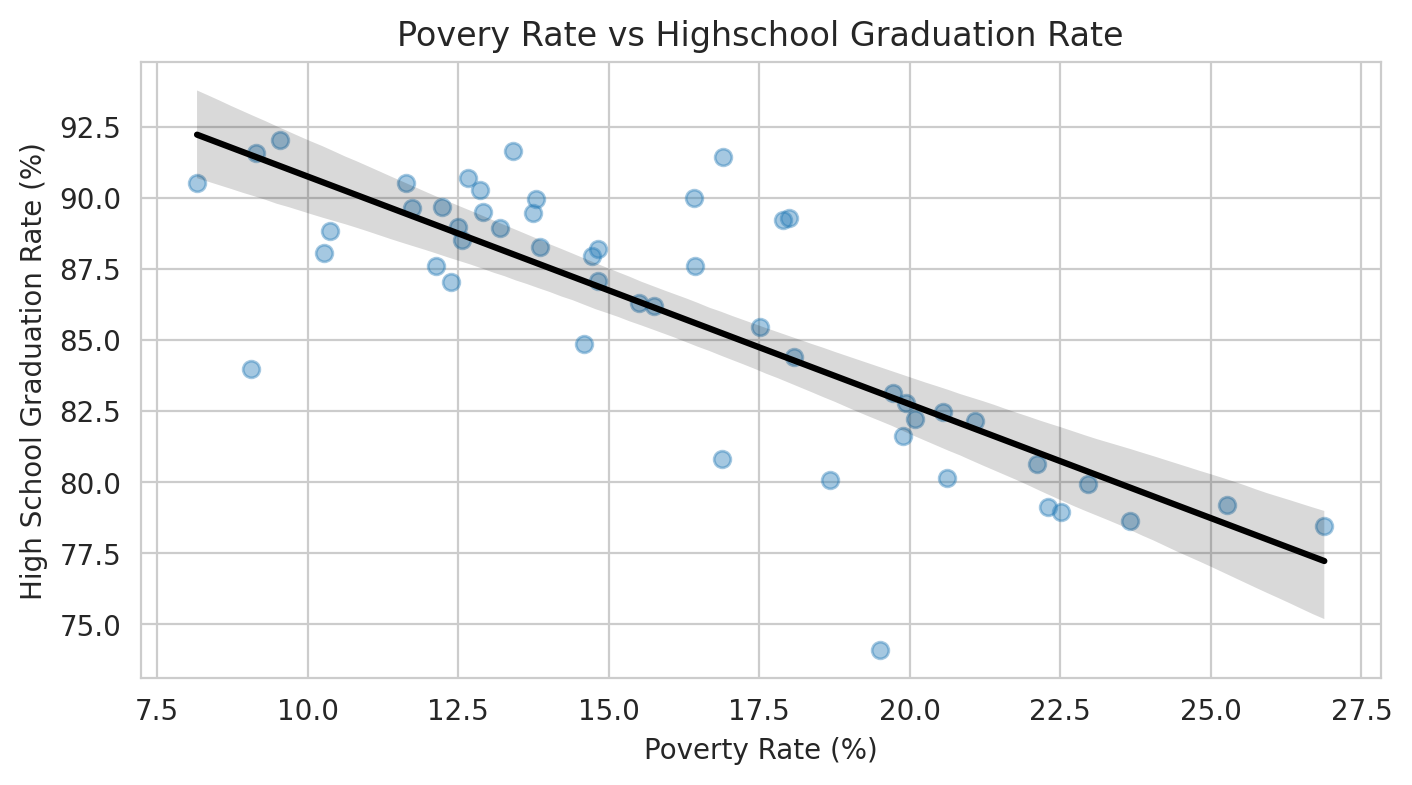

In [ ]:
# sns.regplot(
#     data=df_poverty_vs_gradudation,
#     x='poverty_rate',
#     y='graduation_rate'
#     )

plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=df_poverty_vs_gradudation,
            x='poverty_rate',
            y='graduation_rate',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})


plt.title("Povery Rate vs Highschool Graduation Rate")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("High School Graduation Rate (%)")

# Racial Makeup of Each US State

In [ ]:
# Convert the share columns from strings to floats.
df_share_race_city = df_share_race_city.astype({"share_white":"float","share_black":"float","share_native_american":"float","share_asian":"float","share_hispanic":"float"})

In [ ]:
# Average the graduation rates of all the cities in each state
df_race_by_state = df_share_race_city.groupby("Geographic area").mean()

<ipython-input-42-8db14a6553f3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_race_by_state = df_share_race_city.groupby("Geographic area").mean()


In [ ]:
df_race_by_state["sum"] = df_race_by_state["share_white"] + df_race_by_state["share_black"] + df_race_by_state["share_native_american"] + df_race_by_state["share_asian"] + df_race_by_state["share_hispanic"]

In [ ]:
df_race_by_state["normaliser"] = 100 / df_race_by_state["sum"]

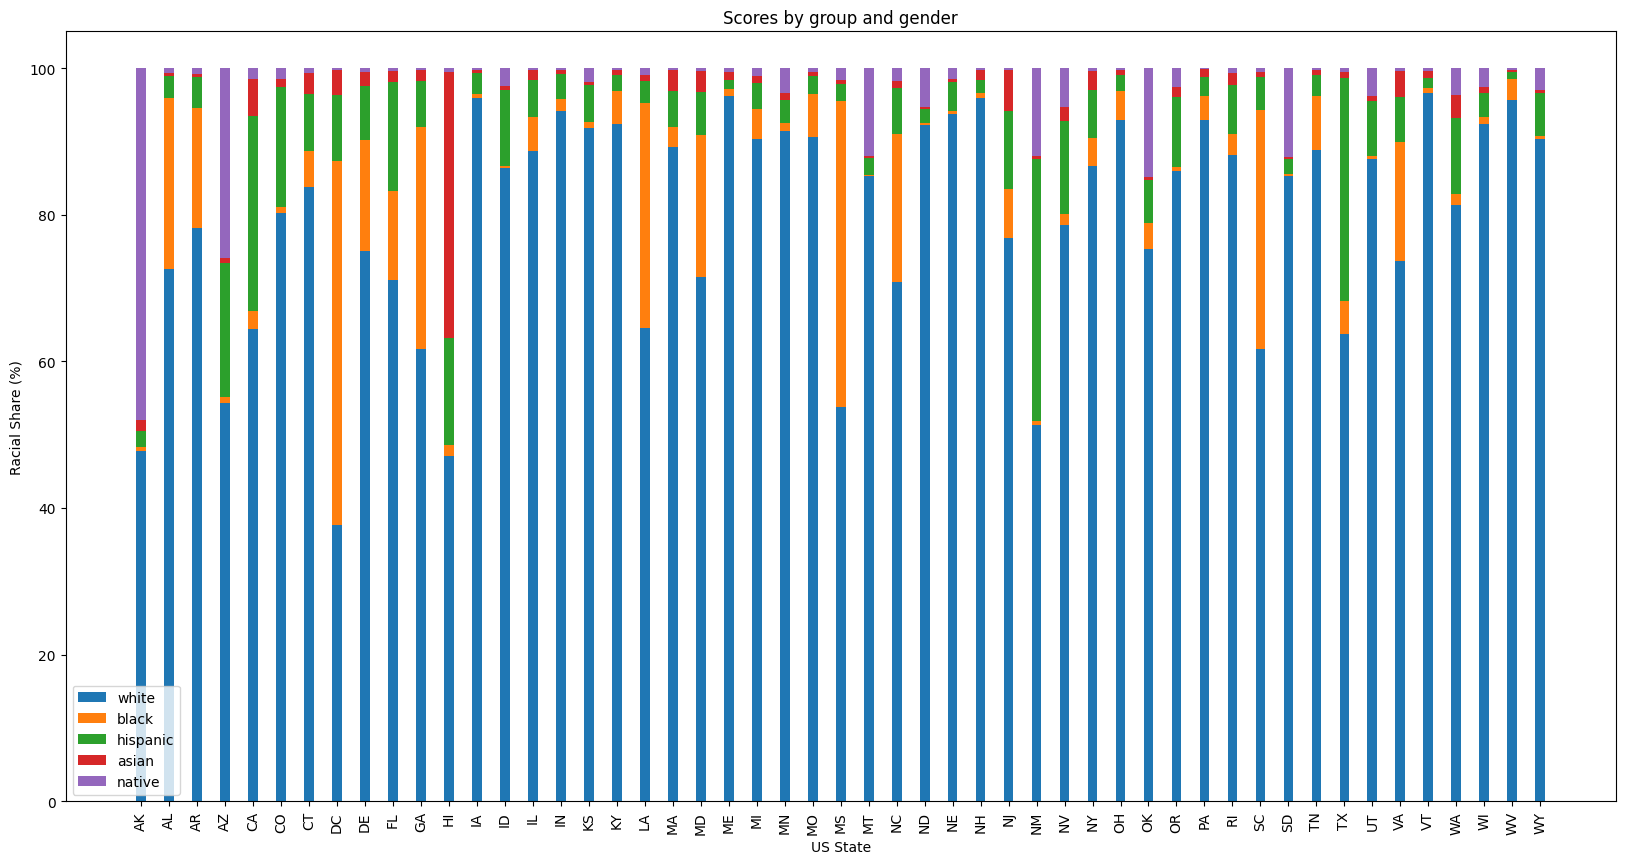

In [ ]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()


labels = df_race_by_state.index
white = df_race_by_state["share_white"] * df_race_by_state["normaliser"]
black = df_race_by_state["share_black"] * df_race_by_state["normaliser"]
hispanic = df_race_by_state["share_hispanic"] * df_race_by_state["normaliser"]
asian = df_race_by_state["share_asian"] * df_race_by_state["normaliser"]
native = df_race_by_state["share_native_american"] * df_race_by_state["normaliser"]
width = 0.35       # the width of the bars: can also be len(x) sequence

ax.bar(labels, white, width, label='white')
ax.bar(labels, black, width, bottom=white, label='black')
ax.bar(labels, hispanic, width, bottom=white+black, label='hispanic')
ax.bar(labels, asian, width, bottom=white+black+hispanic, label='asian')
ax.bar(labels, native, width, bottom=white+black+hispanic+asian, label='native')


ax.set_ylabel('Racial Share (%)')
ax.set_xlabel('US State')
ax.set_title('Scores by group and gender')
plt.xticks(rotation=90)
ax.legend()

Unsurprisigly, all US States have a white majority population.

However, the District of Columbia is the only geographical region of the US that does not have a white majority.

This may be because DC has the largest black proportion of any region.

As espected, Alaska has the highest native proporiation of any state, Hawaii has the highest asian proporsion of any state, and New Mexico has the highest hispanic proportion of any state.

# Police Fatalities by Race

In [ ]:
df_fatalities

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
# By default, the value_counts() function does not show the frequency of NaN values.
df_fatalities_by_race = df_fatalities.value_counts(subset="race")

In [ ]:
px.pie(
    values = df_fatalities_by_race,
    names = ["White","Black","Hispanic","Asian","Native","Other"],
    hole = 0.6,
    title = "Fatalities by Race")

# Police Fatalities by Gender

In [ ]:
df_fatalities_by_gender = df_fatalities.value_counts(subset="gender")

In [ ]:
px.pie(
    values = df_fatalities_by_gender,
    names = ["Male","Female"],
    hole = 0.6,
    title = "Fatalities by Gender")

Unsurprisingly, the vast majority are men.

# Age and Manner of Death

In [ ]:
df_manner_of_death_by_gender = df_fatalities.groupby(["gender","manner_of_death"])["name"].count()

In [ ]:
df_manner_of_death_by_gender.to_frame()

name
gender manner_of_death       
F      shot               102
       shot and Tasered     5
M      shot              2261
       shot and Tasered   167

A possibly significant insight from this data is that, of the Male deaths, 6.9% were shot after having already been tasered.

Whereas, of the Female deaths, it was only 4.7%.

This suggests that men are more likely to continue resisting arrest even after having been tasered.

# Was Suspect Armed?

In [ ]:
df_fatalities.value_counts(subset="armed")

armed
gun                1398
knife               373
vehicle             177
unarmed             171
undetermined        117
                   ... 
bayonet               1
hand torch            1
metal hand tool       1
machete and gun       1
bean-bag gun          1
Length: 68, dtype: int64

In [ ]:
# Recategorise the more niche weapons as simpler ones
df_simplified_weapons = df_fatalities.replace({"bayonet":"knife","machete and gun":"gun","bean-bag gun":"gun","motorcycle":"vehicle","lawn mower blade":"knife","nail gun":"gun","oar":"blunt object","flashlight":"blunt object","metal rake":"sharp object","air conditioner":"blunt object","cordless drill":"sharp object","machete":"knife","Taser":"gun","ax":"sharp object","baseball bat":"blunt object","sword":"knife","hammer":"blunt object","box cutter":"knife","metal pipe":"blunt object","hatchet":"sharp object","crossbow":"gun","gun and knife":"gun","screwdriver":"sharp object","rock":"blunt object","metal stick":"blunt object","scissors":"sharp object","guns and explosives":"gun","meat cleaver":"sharp object","hatchet and gun":"gun","unknown weapon":"undetermined","shovel":"blunt object","pipe":"blunt object","piece of wood":"blunt object","metal pole":"blunt object","metal object":"blunt object","baton":"blunt object","beer bottle":"blunt object","brick":"blunt object","chain saw":"sharp object","glass shard":"sharp object","pole and knife":"knife","carjack":"blunt object","tire iron":"blunt object","straight edge razor":"knife","stapler":"blunt object","spear":"sharp object","chain":"blunt object","pole":"blunt object","garden tool":"blunt object","pitchfork":"sharp object","contractor's level":"blunt object","crowbar":"blunt object","pick-axe":"sharp object","pen":"sharp object","fireworks":"undetermined","baseball bat and fireplace poker":"blunt object","metal hand tool":"blunt object","flagpole":"blunt object","hand torch":"blunt object","baseball bat and bottle":"blunt object"})

In [ ]:
df_fatalities_by_weapon = df_simplified_weapons.value_counts(subset="armed")

([<matplotlib.patches.Wedge at 0x7e3b7c997eb0>,
 [Text(-0.22147154257905977, 1.0774740627168953, 'gun'),
  Text(-0.6704513954444493, -0.8720636022370104, 'knife'),
  Text(0.08337230718009597, -1.096835930481614, 'vehicle'),
  Text(0.5369162058077183, -0.9600630124846203, 'unarmed'),
  Text(0.855978616314506, -0.6908694583004115, 'undetermined'),
  Text(1.02129710657624, -0.40859787089386645, 'toy weapon'),
  Text(1.0840710750783367, -0.18652051945697468, 'blunt object'),
  Text(1.0988976227434315, -0.049234284079640436, 'sharp object')])

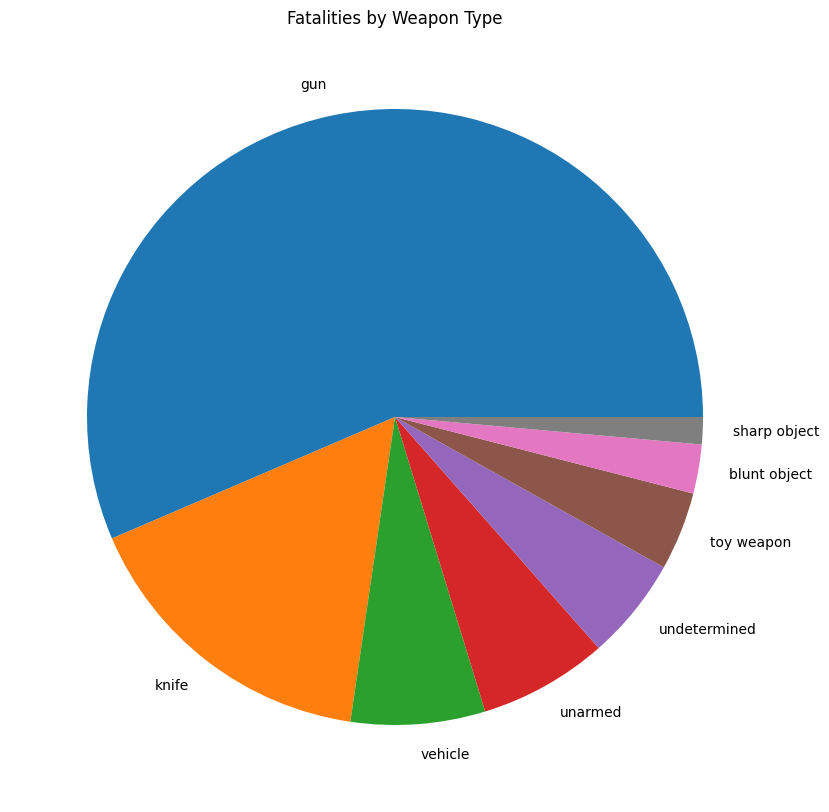

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Fatalities by Weapon Type")
plt.pie(df_fatalities_by_weapon, labels = df_fatalities_by_weapon.index)

The most likely weapon to get a suspect shot is having a gun themselves.

However, this is also skewed by the 2nd Amendment.

In a country where guns are illegal, they would not have such an overwhelming share of this chart.

# Age of Suspect

In [ ]:
# Dropping ages which are Nan leaves behing 2458 rows.
df_fatalities_age_column = df_fatalities["age"].dropna()

In [ ]:
df_fatalities_age_column = df_fatalities_age_column.to_frame()

In [ ]:
# Filtering by age < 25 reveals that 450 people under 25 were killed.
df_fatalities_age_column[df_fatalities_age_column["age"] < 25]

,age
2,23.00
5,18.00
6,22.00
22,23.00
26,24.00
...,...
2504,24.00
2505,24.00
2509,22.00
2516,23.00


Thus the percentage of under 25 year olds killed is 18.3%

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   8.,  16.,
         23.,  54.,  41.,  41.,  52.,  57.,  71.,  83., 103.,  72.,  72.,
         73.,  83.,  74.,  85.,  75.,  78.,  74.,  74.,  91.,  66.,  63.,
         53.,  46.,  52.,  39.,  42.,  32.,  62.,  41.,  37.,  35.,  38.,
         47.,  36.,  31.,  42.,  29.,  28.,  28.,  20.,  18.,  35.,  16.,
         11.,  13.,  16.,  11.,   7.,   8.,   5.,   6.,   7.,   5.,   4.,
          3.,   2.,   2.,   2.,   5.,   2.,   0.,   1.,   1.,   0.,   2.,
          2.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([ 6.        ,  6.98837209,  7.97674419,  8.96511628,  9.95348837,
        10.94186047, 11.93023256, 12.91860465, 13.90697674, 14.89534884,
        15.88372093, 16.87209302, 17.86046512, 18.84883721, 19.8372093 ,
        20.8255814 , 21.81395349, 22.80232558, 23.79069767, 24.77906977,
        25.76744186, 26.75581395, 27.74418605, 28.73255814, 29.72093023,
        30.70930233, 31.69767442, 32.68604651, 33.674

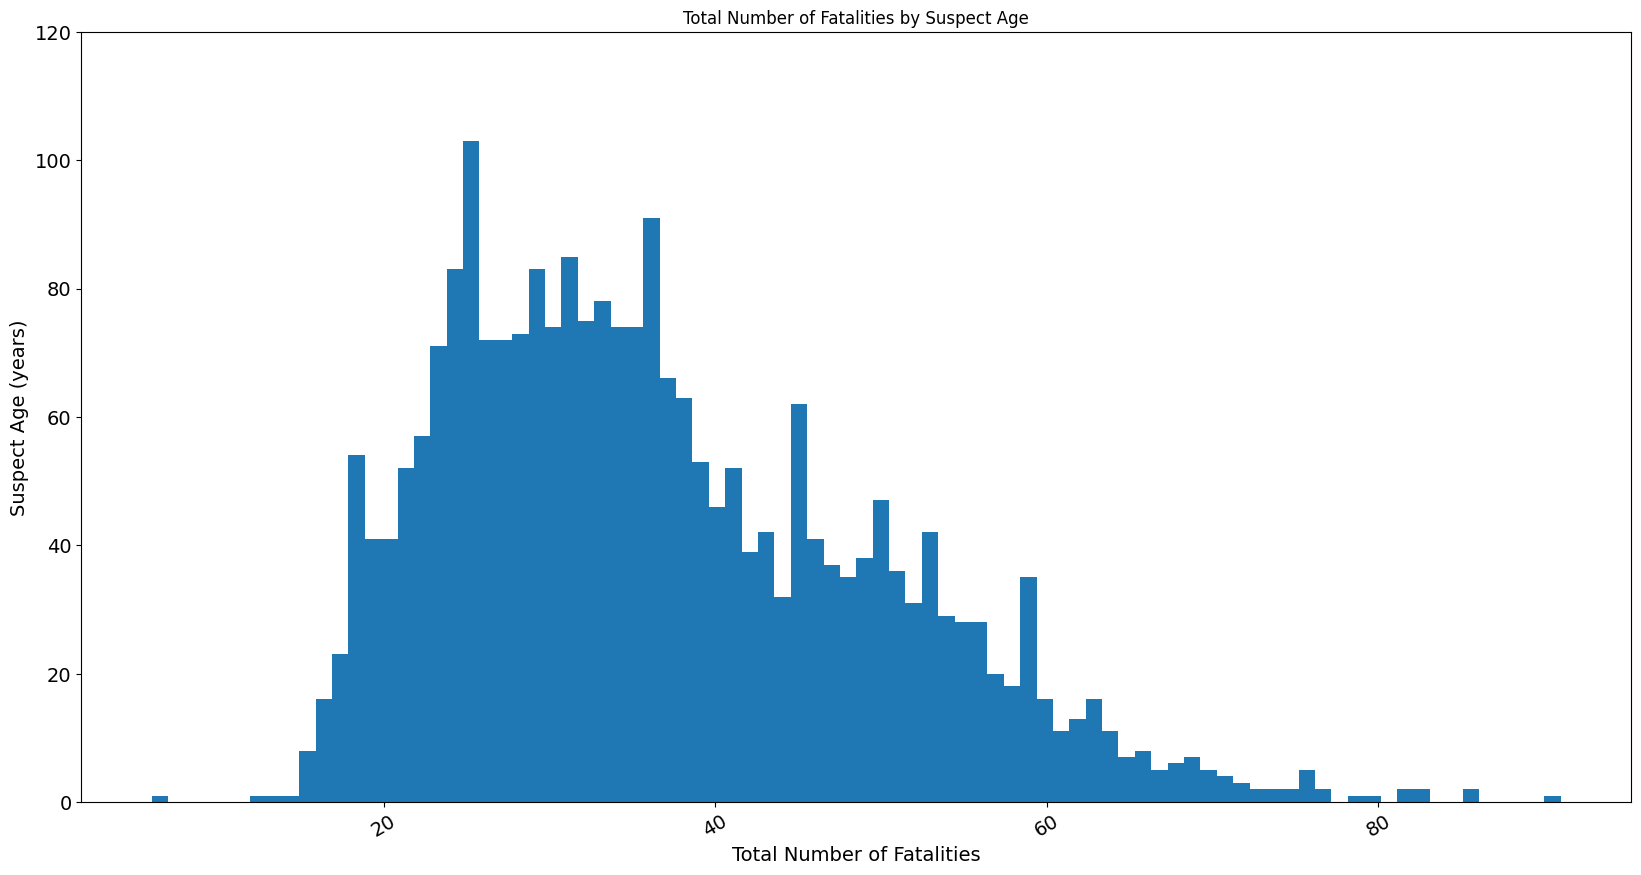

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Total Number of Fatalities by Suspect Age")
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Total Number of Fatalities", fontsize=14)
plt.ylabel("Suspect Age (years)", fontsize=14)
plt.ylim(0,120)
plt.hist(df_fatalities_age_column, bins=86)

The vast majority were ages between 20 and 40.

There was one case of a 6 year old being shot, and also one of a 91 year old being shot.

In [ ]:
df_fatalities_by_age = df_fatalities.groupby("age")["name"].count()

<ipython-input-64-e341a5c8a985>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 0, 'Suspect Age (years)')

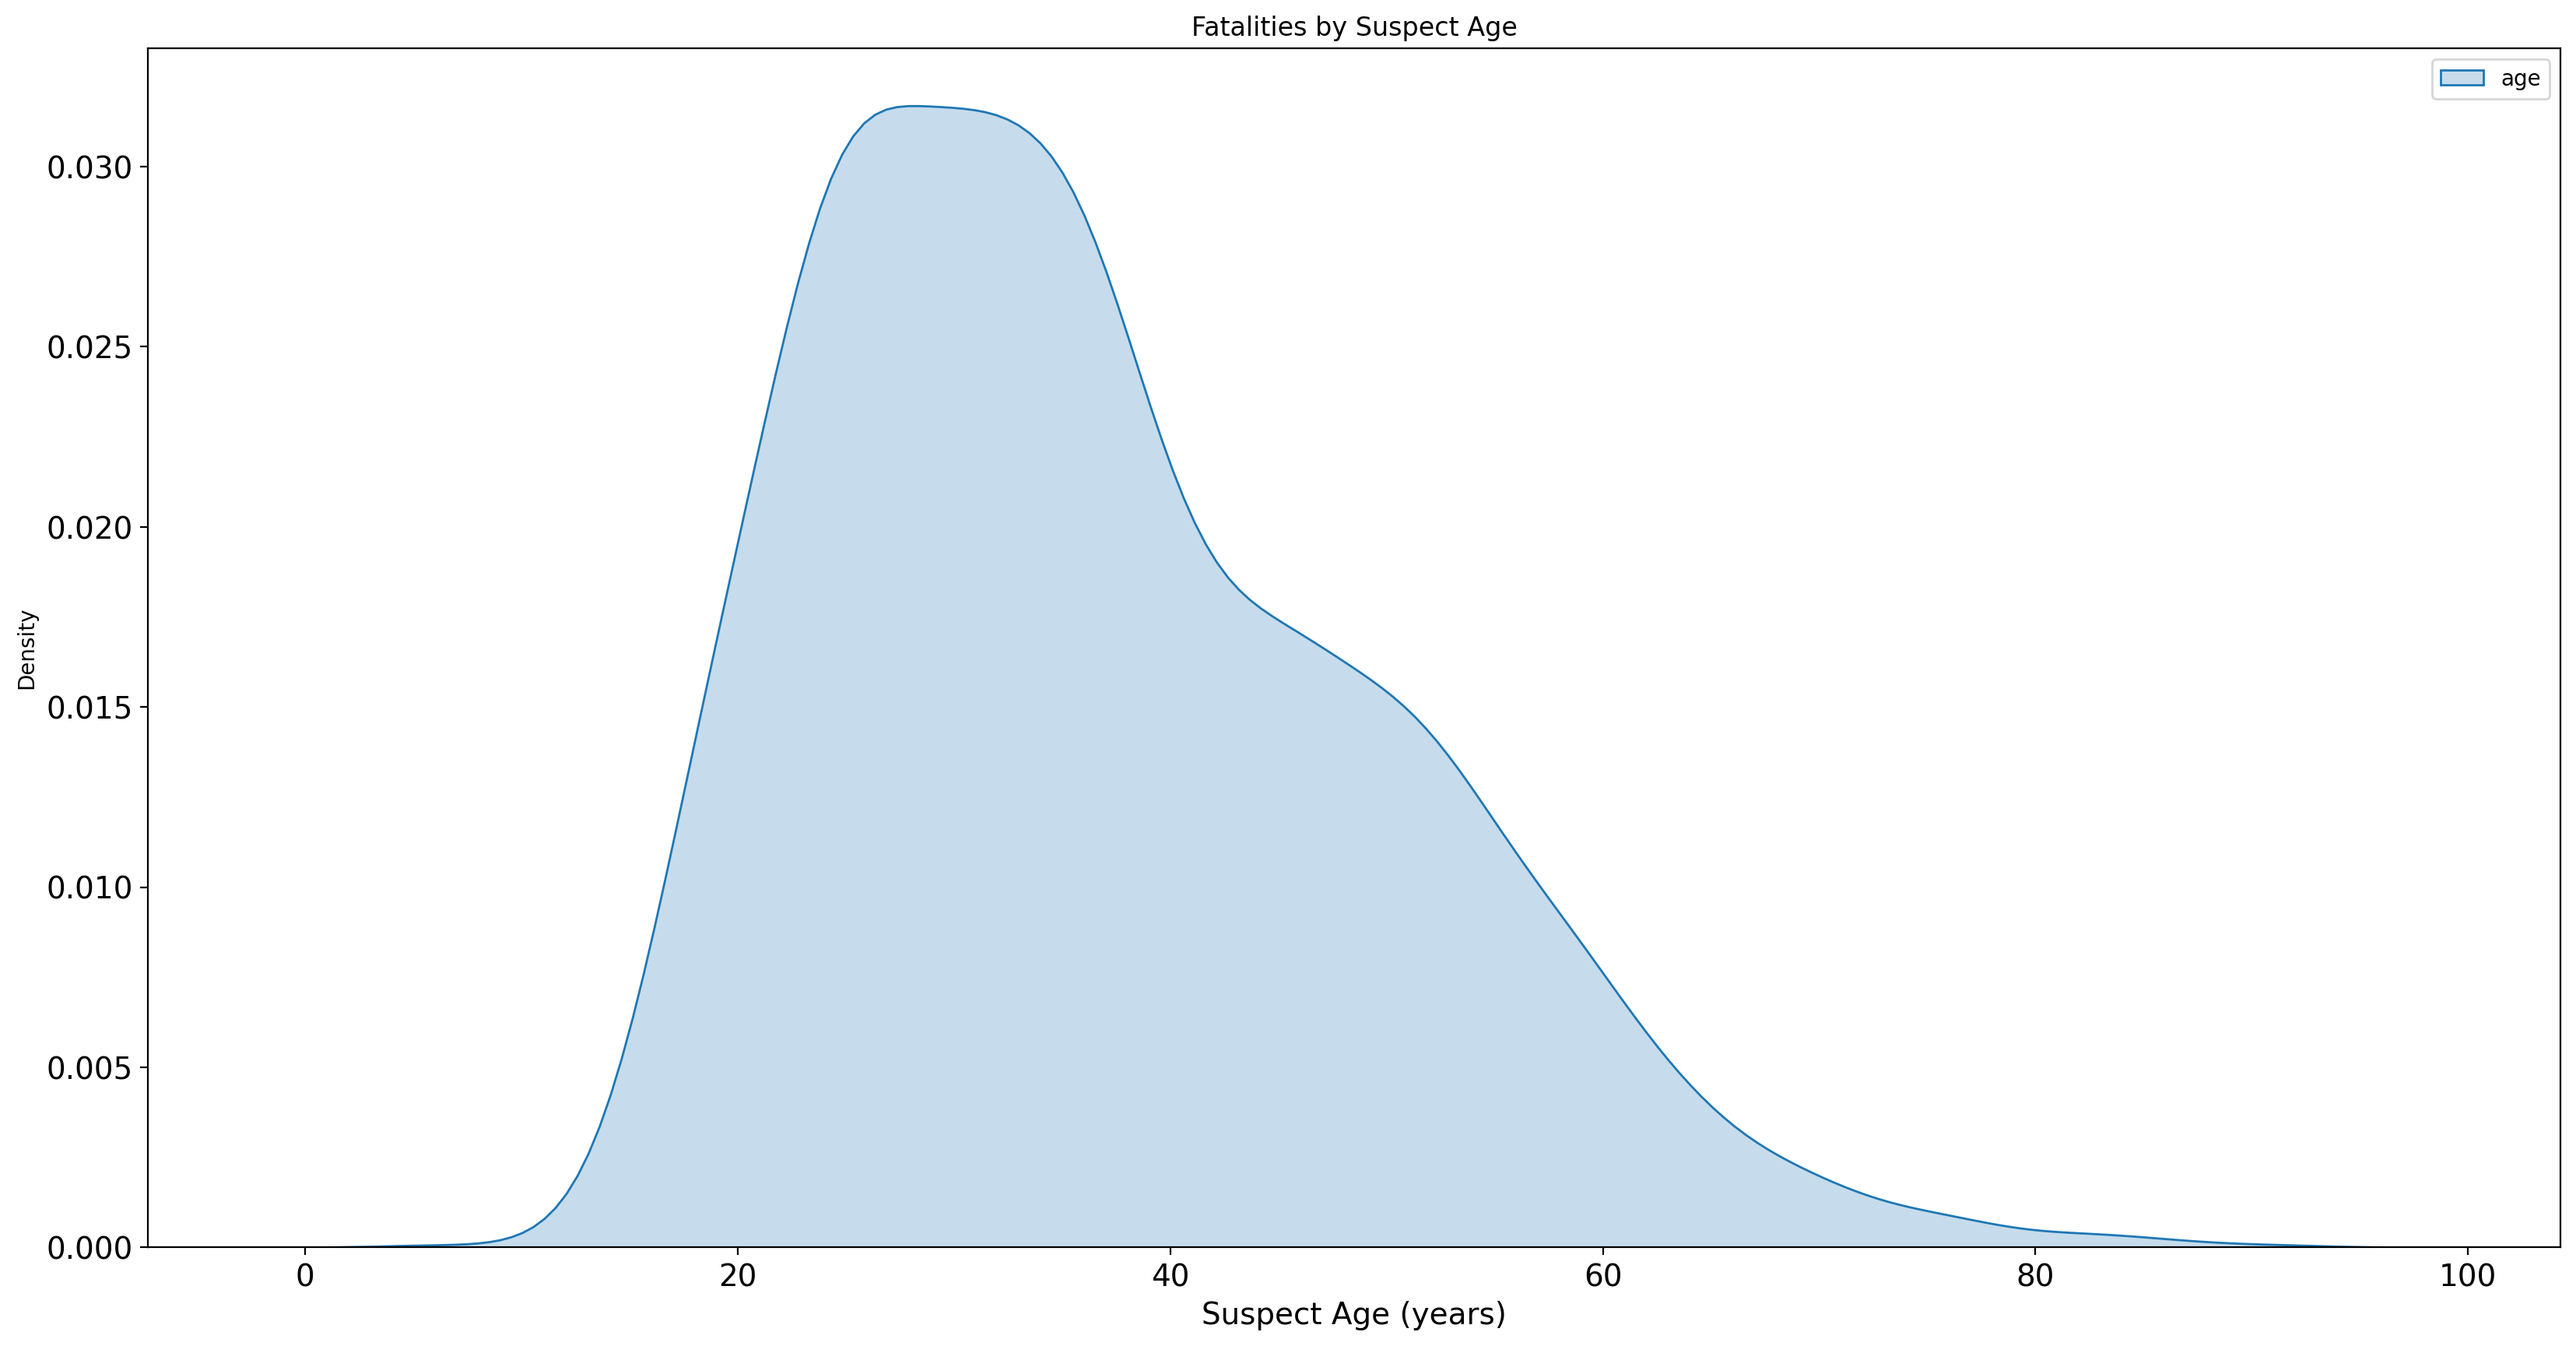

In [ ]:
plt.figure(figsize=(20,10), dpi=200)
sns.kdeplot(df_fatalities_age_column, shade=True)
plt.title('Fatalities by Suspect Age')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Suspect Age (years)", fontsize=14)

This KDE plot better shows that the worst age demographic is people in their early thirties.

There is also a slight plateau at age 50. Midlife crisis perhaps?

In [ ]:
df_fatalities_by_age_and_race = df_fatalities["age"].to_frame()
df_fatalities_by_age_and_race["race"] = df_fatalities["race"].to_frame()

In [ ]:
df_fatalities_by_age_and_race = df_fatalities_by_age_and_race.dropna()

In [ ]:
df_fatalities_by_age_and_race

,age,race
0,53.00,A
1,47.00,W
2,23.00,H
3,32.00,W
4,39.00,H
...,...,...
2519,16.00,B
2523,25.00,B
2525,39.00,B
2533,28.00,B


In [ ]:
#This data frame cannot be used for a multi kde plot.
#Also using the groupby method is unhelpful as it does not keep the frequency.
#Instead use .pivot()
df_fatalities_by_age_and_race = df_fatalities_by_age_and_race.pivot(columns="race")

In [ ]:
df_fatalities_by_age_and_race

age                          
race     A     B     H   N   O     W
0    53.00   NaN   NaN NaN NaN   NaN
1      NaN   NaN   NaN NaN NaN 47.00
2      NaN   NaN 23.00 NaN NaN   NaN
3      NaN   NaN   NaN NaN NaN 32.00
4      NaN   NaN 39.00 NaN NaN   NaN
...    ...   ...   ...  ..  ..   ...
2519   NaN 16.00   NaN NaN NaN   NaN
2523   NaN 25.00   NaN NaN NaN   NaN
2525   NaN 39.00   NaN NaN NaN   NaN
2533   NaN 28.00   NaN NaN NaN   NaN
2534   NaN 32.00   NaN NaN NaN   NaN

[2311 rows x 6 columns]

In [ ]:
df_fatalities_by_age_and_race = df_fatalities_by_age_and_race.rename(columns={"A":"Asian","B":"Black","H":"Hispanic","N":"Native","O":"Other","W":"White"})

<Axes: title={'center': 'Police Fatality by Suspect Age and Race'}, ylabel='Density'>

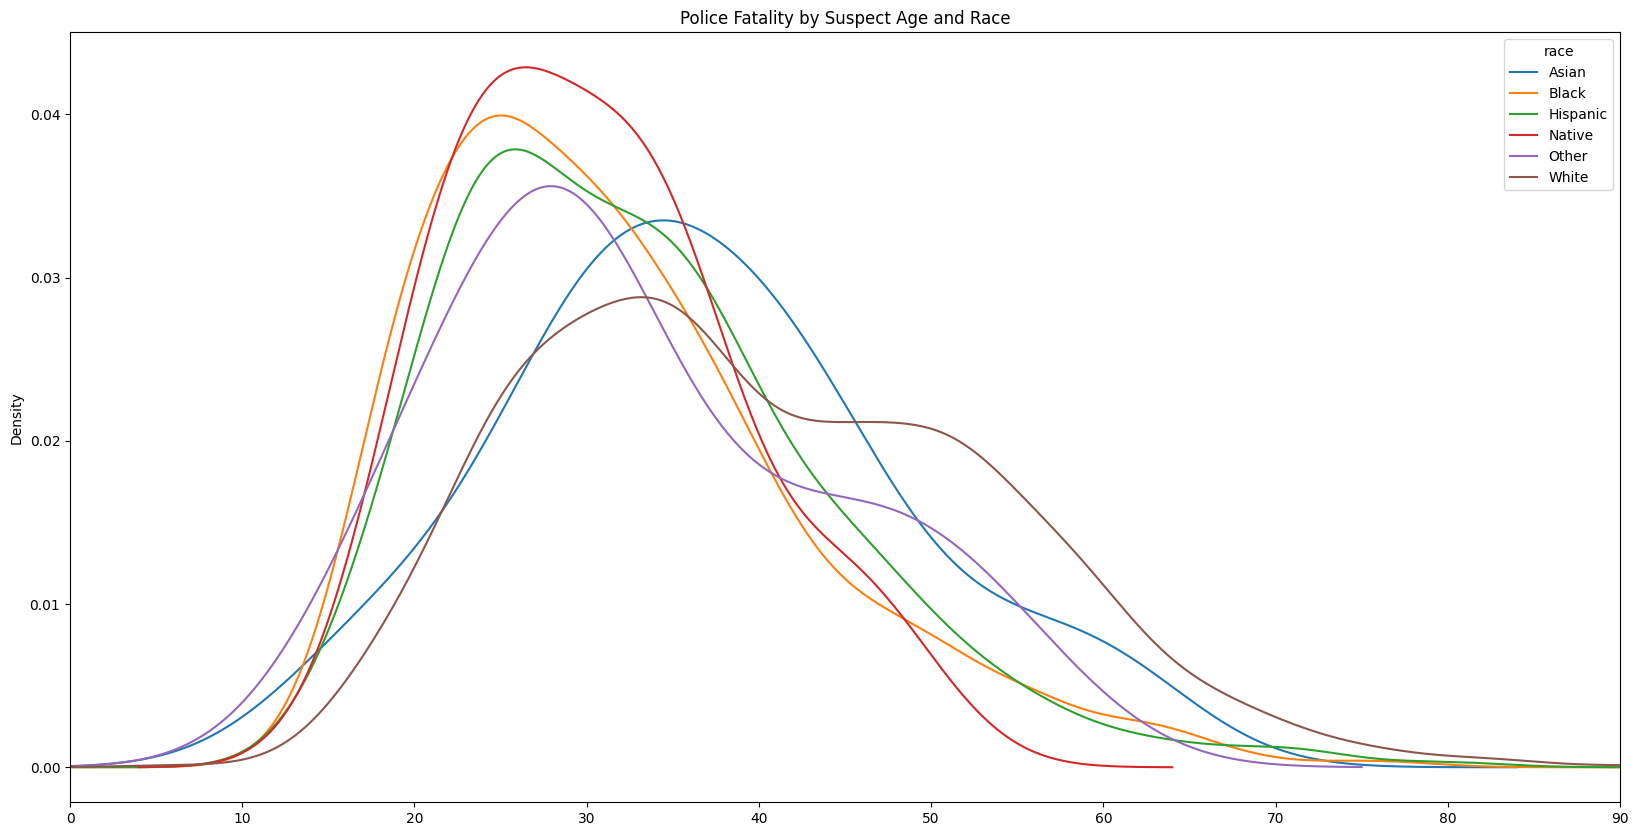

In [ ]:
#df_fatalities_by_age_and_race.plot.kde()
df_fatalities_by_age_and_race["age"].plot(
    figsize=(20,10),
    kind="kde",
    title="Police Fatality by Suspect Age and Race",
    xlim=(0,90)
    )

Interestingly, the peak age varies depending on the race.

Black people have the youngest peak of about 25.

Whilst asian people havve the highest peak of about 35.

# Mental Illness and Police Killings

In [ ]:
df_fatalities.value_counts(subset="signs_of_mental_illness")

signs_of_mental_illness
False    1902
True      633
dtype: int64

The percentage of fatalities with mental illness = 24.97%

A large over representation when compare with the general population.

# Top 10 Most Dangerous Cities

In [ ]:
# Find top 10 cities with most fatalities.
df_fatalities.value_counts(subset="city")[:10]

city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Miami          18
Austin         18
St. Louis      15
dtype: int64

In [ ]:
# Remove the rows which are not from these cities
df_top_10_cities = df_fatalities[df_fatalities["city"].isin(["Los Angeles", "Phoenix","Houston","Chicago","Las Vegas","San Antonio","Columbus","Miami","Austin","St. Louis"])]

In [ ]:
# Group by city
df_top_10_cities = df_top_10_cities.value_counts("city")

<BarContainer object of 10 artists>

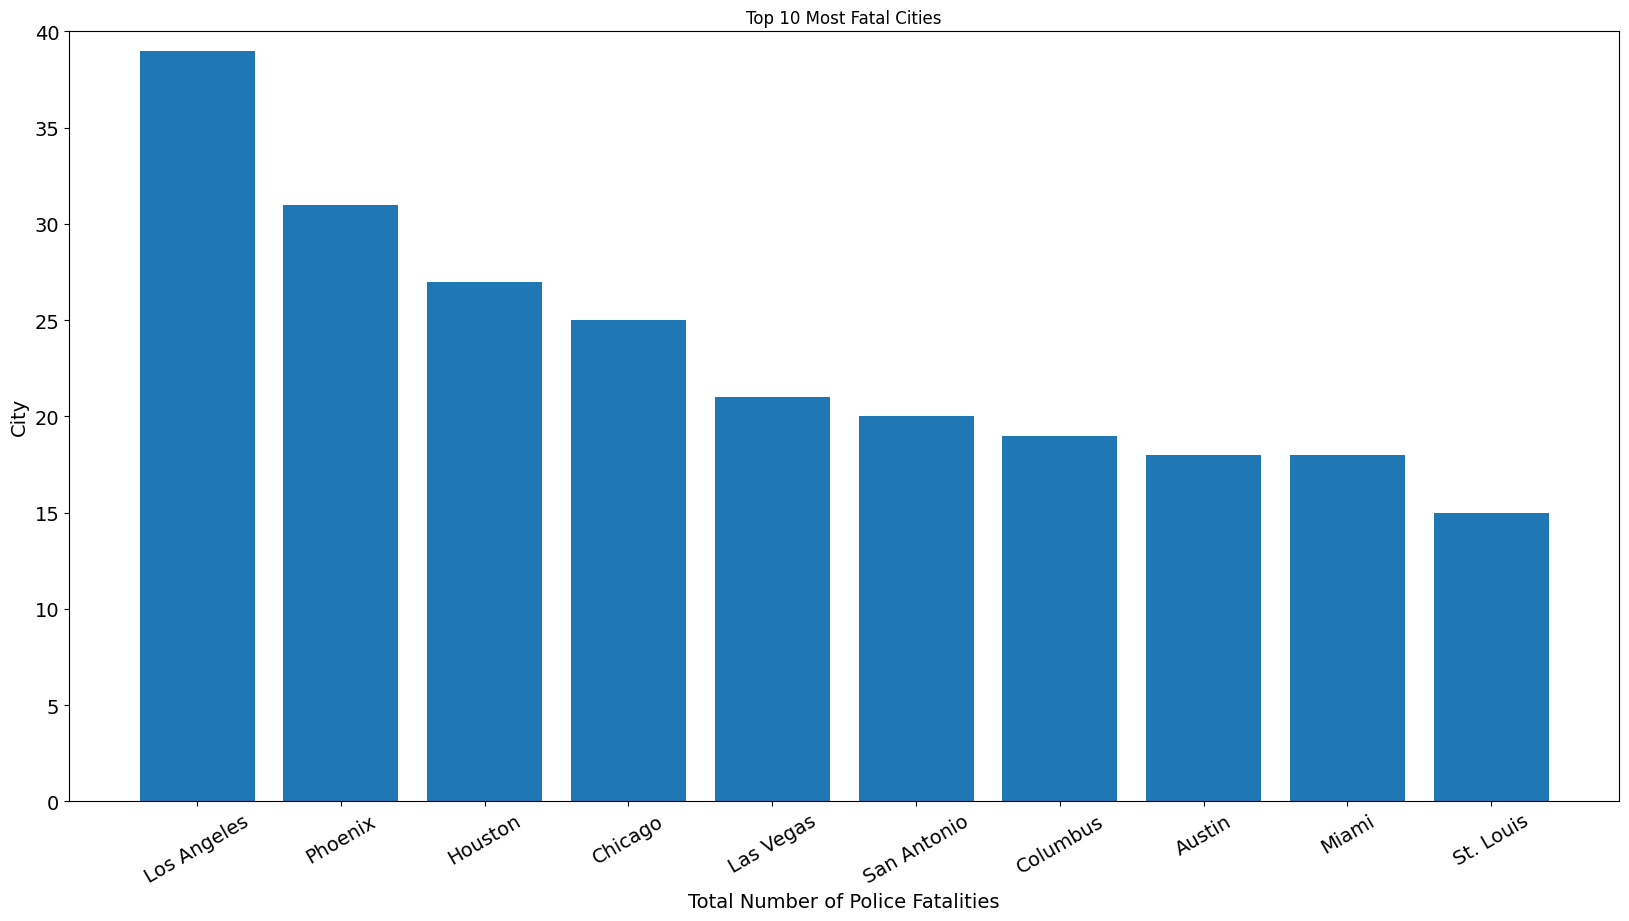

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Top 10 Most Fatal Cities")
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Total Number of Police Fatalities", fontsize=14)
plt.ylabel("City", fontsize=14)
plt.ylim(0,40)
plt.bar(df_top_10_cities.index, df_top_10_cities.to_list())

# Police Fatalities by US State

In [ ]:
df_fatalities_by_state = df_fatalities.groupby("state")["name"].count()

In [ ]:
df_fatalities_by_state = df_fatalities_by_state.to_frame()

In [ ]:
df_fatalities_by_state = df_fatalities_by_state.rename(columns={"name":"Number of Police Fatalitites"})

In [ ]:
#df_fatalities

fig = px.choropleth(
    df_fatalities_by_state,
    locations = df_fatalities_by_state.index,
    locationmode = 'USA-states',
    color = "Number of Police Fatalitites",
    title = "Number of Police Fatalities by State",
    scope = "usa",
    width = 1700,
    height = 900,
    color_continuous_scale = px.colors.sequential.matter,
    labels = {"Success_Rate":"Success Rate"})

fig.show()

California is by far the most dangerous state.

Texas is second.

Florida is third.

However, it must be noted that these states also have the largest populations (in that order too).

By comparing this with our earlier chart, it can be seen that the states with higher poverty rates also have higher numbers of police fatalities.

# Police Fatalitites Over Time

In [ ]:
# Convert "date" column to datetime objects
# Use normalize() to keep the dtype as datetime64
df_fatalities["date"] = pd.to_datetime(df_fatalities['date'], utc=True).dt.normalize()

In [ ]:
df_fatalities_by_month = pd.to_datetime(df_fatalities['date']).dt.to_period('M').value_counts().sort_index()

<ipython-input-81-8178271afbee>:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [ ]:
df_fatalities_by_month = df_fatalities_by_month.rename_axis('month').reset_index(name='counts')

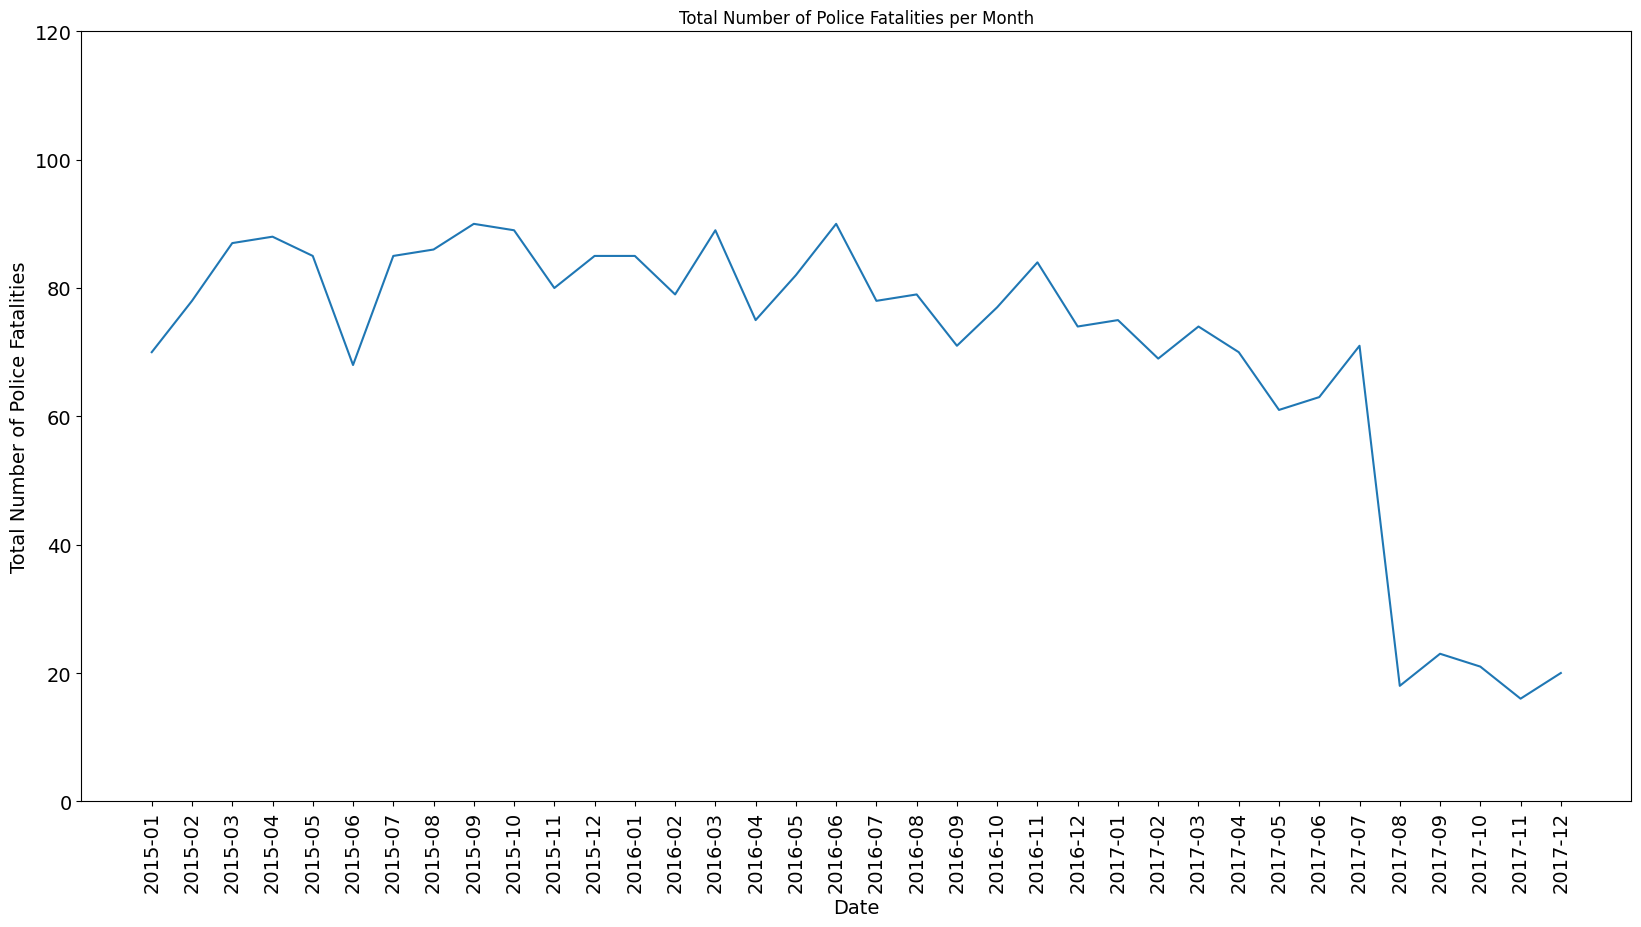

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Total Number of Police Fatalities per Month")
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Number of Police Fatalities", fontsize=14)
plt.ylim(0,120)
plt.plot(df_fatalities_by_month['month'].astype(dtype=str), df_fatalities_by_month["counts"])

There was a sharp decrease in August of 2017.

After research it is still unclear why.